## Title : Ose Of Machine Learning For Stroke Prediction: Enhanching Early Detection And Prevention


#### Column Explanation
1. id- Unique Identification
2. gender- Showing the gender of a patient (Male,Female and Others)
3. age - Age of patient's
4. hypertension - 0 shows patient has no hyper tension 1 shows patient has patient has hypertension
5. heart_disease - 0 shows patient has heart disease and 1 shows patient has heart disease
6. Marital_status - It shows the patient's are married or not
7. Profession - the patient's profession
8. Residence_status - Where the patient lived
9. avg_glucose_level - Glucose level in the blood
10. bmi - Body mass index
11. smoking status - if the person is smking or not
12. stroke - 1 shows the patient had a stroke and 0 is the patient had not a stroke



### Library Importing

In [1]:
# Library importing
import numpy as np              # Numerical computing
import pandas as pd            # Data manipulation and analysis
import seaborn as sns          # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting library
%matplotlib inline             


# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV  # Grid Search for hyperparameter tuning

from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')

import warnings
warnings.filterwarnings('ignore')

#### Data-Preparation¶


In [2]:
stroke_df = pd.read_csv('F:/Nihal/Thesis/Code file/Dataset/healthcare-dataset-stroke-data.csv')

In [3]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke_df.drop(columns='id',inplace=True)  

In [6]:
stroke_df.info() # # checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
stroke_df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [9]:
col=stroke_df.columns.tolist() # storing all the columns names

#### Check For Null Values

In [10]:
print('Number of missing value')
print('----------------------------')
for col_name in col:
    print('{} :- {}'.format(col_name,stroke_df[col_name].isnull().sum()))


Number of missing value
----------------------------
gender :- 0
age :- 0
hypertension :- 0
heart_disease :- 0
ever_married :- 0
work_type :- 0
Residence_type :- 0
avg_glucose_level :- 0
bmi :- 201
smoking_status :- 0
stroke :- 0


In [11]:
indices = stroke_df[stroke_df.isna().any(axis=1)].index
stroke_df[stroke_df.isna().any(axis=1)]



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


#### We can see BMI has 201 NaN values, which will be replace by mean value

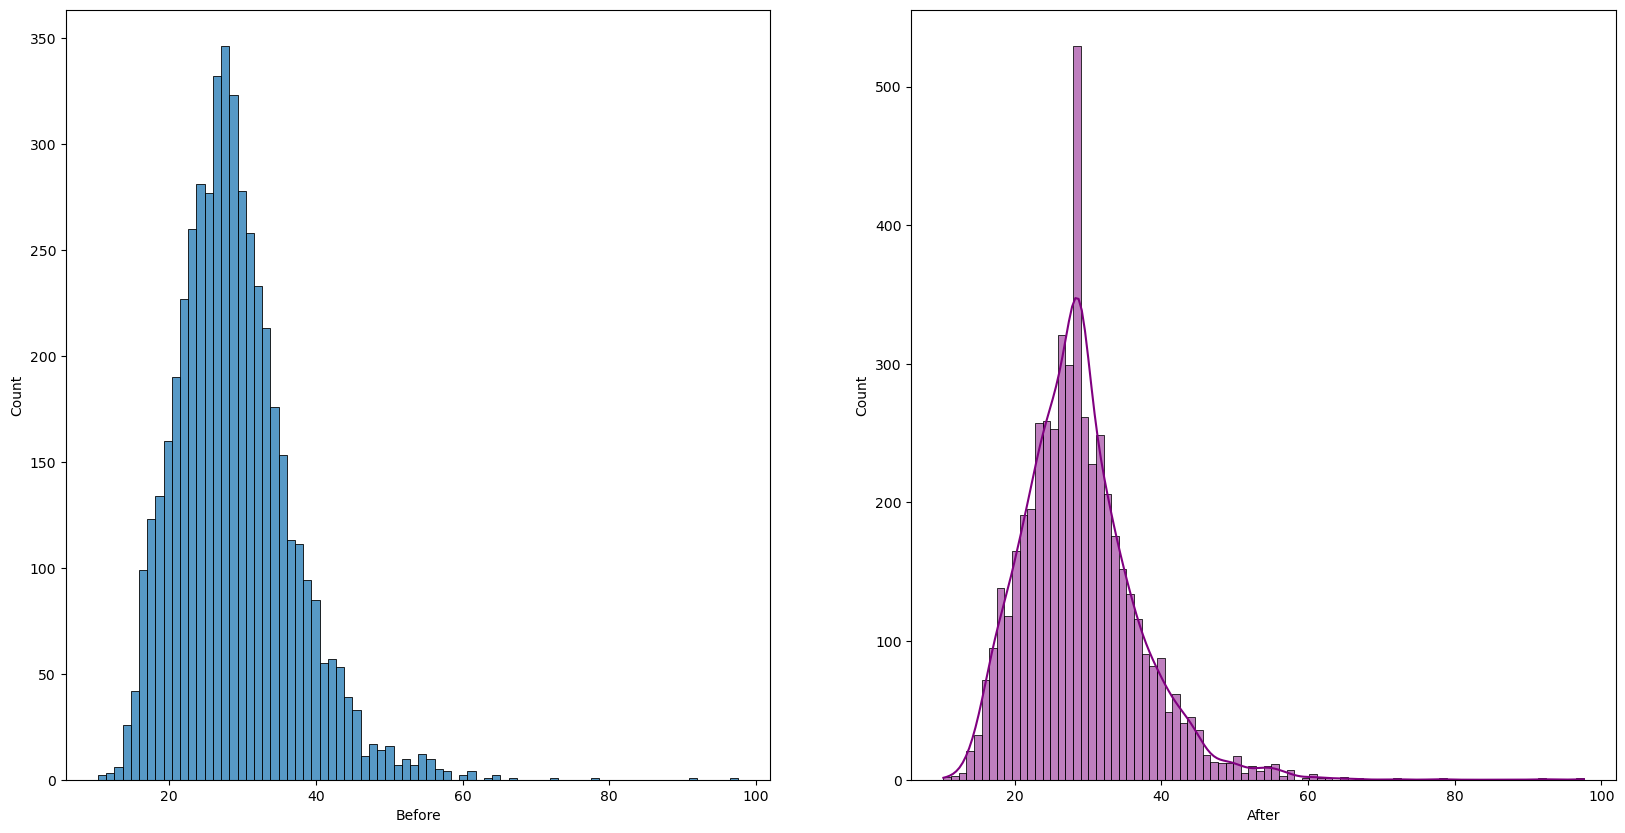

In [12]:
fig,ax=plt.subplots(1,2,figsize=(20,10))

sns.histplot(stroke_df['bmi'],ax=ax[0])
ax[0].set_xlabel('Before')
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(),inplace=True)

sns.histplot(stroke_df['bmi'],color='purple',ax=ax[1],kde=True)
ax[1].set_xlabel('After')

plt.show()

In [13]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
sns.set_style('darkgrid') # Using style for visualization

#### Checking for duplicate values

In [15]:
for col_name in col:
    print('{} :- {}'.format(col_name,stroke_df[col_name].duplicated().sum()))

gender :- 5107
age :- 5006
hypertension :- 5108
heart_disease :- 5108
ever_married :- 5108
work_type :- 5105
Residence_type :- 5108
avg_glucose_level :- 1131
bmi :- 4691
smoking_status :- 5106
stroke :- 5108


#### Check for Unique values

In [16]:
for col_name in col:
    print('{} :- {}'.format(col_name,stroke_df[col_name].unique()))
    print('---------------------------')
    print('---------------------------')

gender :- ['Male' 'Female' 'Other']
---------------------------
---------------------------
age :- [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-

#### Adding Extra Column To Group By Age¶

In [17]:
stroke_df["age_group"]=stroke_df["age"].apply(lambda x:"Infant" if (x>=0)&(x<=2)
                                  else ("Child" if (x>2)&(x<=12)
                                  else ("Adolescent"if (x>12)&(x<=18)  
                                  else ("Young Adults"if (x>19)&(x<=35)  
                                  else ("Middle Aged Adults" if (x>35)&(x<=60) 
                                  else "Old Aged Adults")))))

In [18]:
stroke_df.groupby(["gender","ever_married","age_group"])["bmi"].mean()

gender  ever_married  age_group         
Female  No            Adolescent            26.283425
                      Child                 19.730225
                      Infant                18.473412
                      Middle Aged Adults    30.169438
                      Old Aged Adults       29.633533
                      Young Adults          28.155435
        Yes           Middle Aged Adults    31.454745
                      Old Aged Adults       29.626728
                      Young Adults          30.527357
Male    No            Adolescent            25.574576
                      Child                 19.941770
                      Infant                19.526806
                      Middle Aged Adults    31.689083
                      Old Aged Adults       28.805882
                      Young Adults          28.613798
        Yes           Adolescent            27.400000
                      Middle Aged Adults    31.832601
                      Old Aged Adults    

#### Checking For Outliers¶


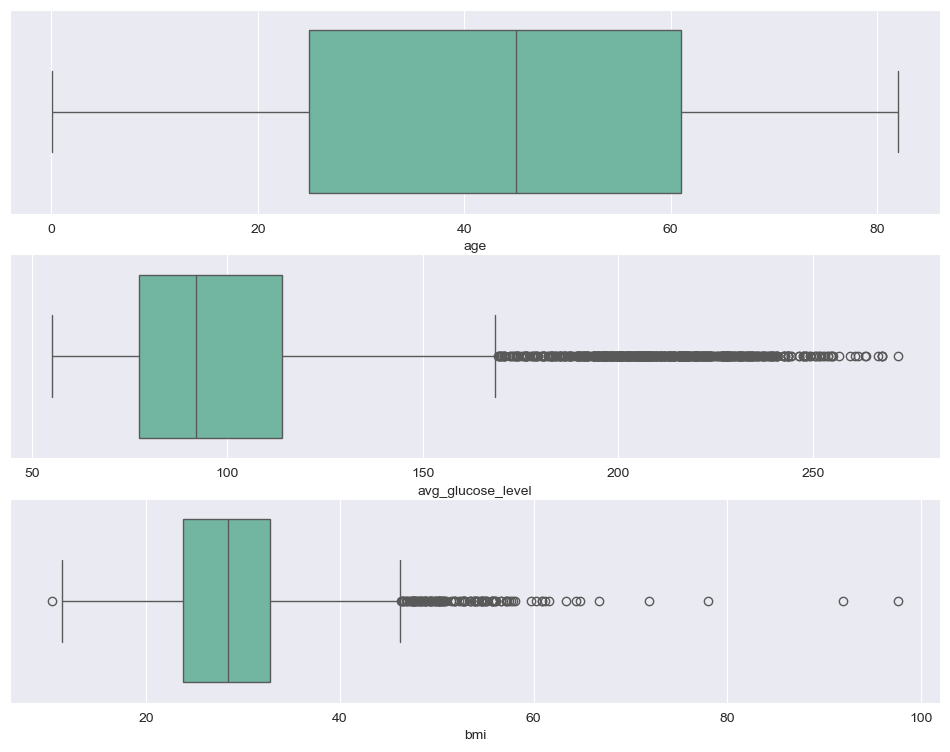

In [19]:
plt.figure(figsize=(12,9))
for i,col in enumerate(stroke_df.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=stroke_df,x=col,palette =sns.color_palette("Set2"))

In [20]:
stroke_df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

#### There is alot of outliers in bmi and avg glucose level However by searching online most of these values are normal so we just remove enough to be in the acceptable range

In [21]:
stroke_df = stroke_df[(stroke_df["bmi"]<66) & (stroke_df["bmi"]>12)]

In [22]:
stroke_df = stroke_df[(stroke_df["avg_glucose_level"]>56) & (stroke_df["avg_glucose_level"]<250)] 

** The average glucose level is between 56 and 250 (inclusive of 56 but exclusive of 250).
The BMI is between 12 and 66 (inclusive of 12 but exclusive of 66).

#### There is only one row with other gender might as well remove it

In [23]:
stroke_df=stroke_df.drop(stroke_df[stroke_df["gender"]=="Other"].index)

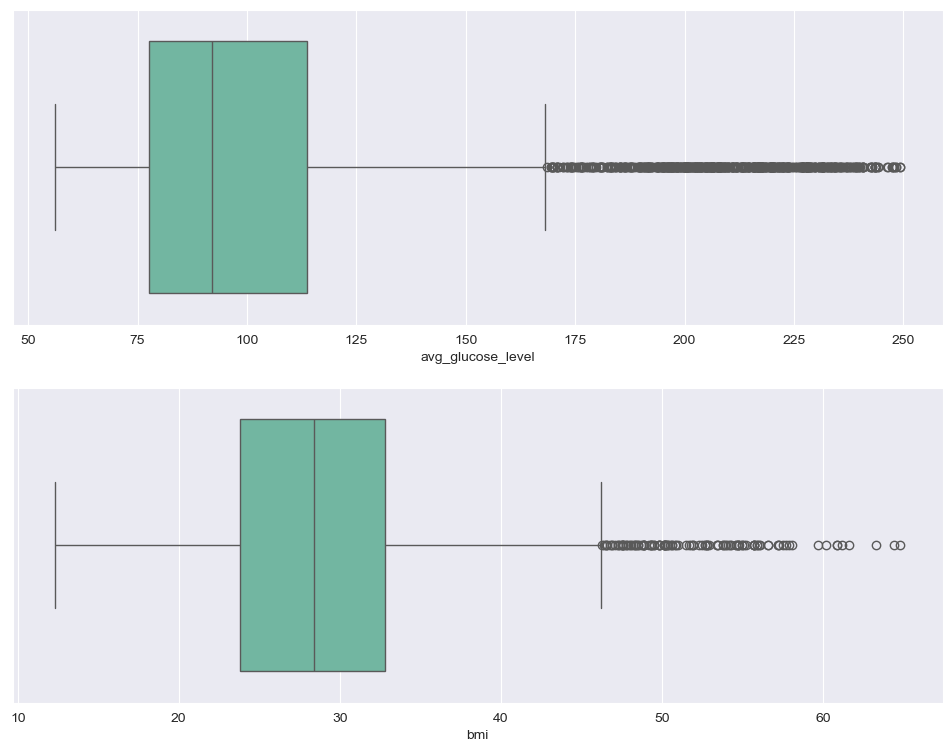

In [24]:
plt.figure(figsize=(12,9))
for i,col in enumerate(stroke_df.select_dtypes(float).columns[1:]):
    plt.subplot(2,1,i+1)
    sns.boxplot(data=stroke_df,x=col,palette =sns.color_palette("Set2"))

***  There is still outliers however removing these will be considered loss of information since these are true outliers

#### Outlier-Handling 

In [25]:
def fix_outliers(col):
    # Calculate the 25th and 75th percentiles (Q1 and Q3) for the column
    quantile_25 = stroke_df[col].quantile(0.25)
    quantile_75 = stroke_df[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = quantile_75 - quantile_25
    
    # Define the upper and lower bounds for detecting outliers
    upper_bound = quantile_75 + 1.5 * IQR
    lower_bound = quantile_25 - 1.5 * IQR
    
    # Print the header for the column
    print(f"\n-------------------------- {col} --------------------------\n")
    
    # Detect outliers
    outliers = stroke_df[(stroke_df[col] > upper_bound) | (stroke_df[col] < lower_bound)]
    num_outliers = outliers.shape[0]
    
    # Print the number of outliers detected
    print(f"Outliers found in {num_outliers} rows")
    print("---------------------------------")
    
    # Print the upper and lower limits for outlier detection
    print("Upper and lower limits for outlier detection")
    print(f"Upper limit: {upper_bound}")
    print(f"Lower limit: {lower_bound}")
    print("---------------------------------")
    
    # Replace outliers with the upper or lower limit
    stroke_df[col] = np.where(stroke_df[col] > upper_bound, upper_bound,
                              np.where(stroke_df[col] < lower_bound, lower_bound,
                                       stroke_df[col]))
    
    # Print the number of outliers after modification
    modified_outliers = stroke_df[(stroke_df[col] > upper_bound) | (stroke_df[col] < lower_bound)]
    num_modified_outliers = modified_outliers.shape[0]
    
    print("After modifying all the rows")
    print(f"Outliers found in {num_modified_outliers} rows\n")
    print("----------------------- Modified Rows ------------------------")
    
    # Return the DataFrame containing the original outliers
    return outliers


In [26]:
fix_outliers('avg_glucose_level')


-------------------------- avg_glucose_level --------------------------

Outliers found in 602 rows
---------------------------------
Upper and lower limits for outlier detection
Upper limit: 168.2925
Lower limit: 23.0325
---------------------------------
After modifying all the rows
Outliers found in 0 rows

----------------------- Modified Rows ------------------------


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Old Aged Adults
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Old Aged Adults
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Middle Aged Adults
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Old Aged Adults
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1,Old Aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.300000,never smoked,0,Middle Aged Adults
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.900000,never smoked,0,Old Aged Adults
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.700000,Unknown,0,Middle Aged Adults
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.300000,Unknown,0,Old Aged Adults


In [27]:
fix_outliers('bmi')


-------------------------- bmi --------------------------

Outliers found in 119 rows
---------------------------------
Upper and lower limits for outlier detection
Upper limit: 46.29999999999999
Lower limit: 10.300000000000006
---------------------------------
After modifying all the rows
Outliers found in 0 rows

----------------------- Modified Rows ------------------------


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
21,Female,52.0,1,0,Yes,Self-employed,Urban,168.2925,48.9,never smoked,1,Middle Aged Adults
66,Female,70.0,0,0,Yes,Private,Urban,168.2925,47.5,never smoked,1,Old Aged Adults
113,Female,45.0,0,0,Yes,Private,Rural,168.2925,56.6,never smoked,1,Middle Aged Adults
254,Female,47.0,0,0,Yes,Private,Urban,168.2925,50.1,Unknown,0,Middle Aged Adults
258,Female,74.0,1,0,Yes,Self-employed,Urban,168.2925,54.6,never smoked,0,Old Aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...
4906,Female,53.0,0,0,Yes,Private,Urban,70.5100,54.1,never smoked,0,Middle Aged Adults
4952,Male,51.0,1,0,Yes,Self-employed,Rural,168.2925,56.6,never smoked,0,Middle Aged Adults
5009,Female,50.0,0,0,Yes,Self-employed,Rural,126.8500,49.5,formerly smoked,0,Middle Aged Adults
5057,Female,49.0,0,0,Yes,Govt_job,Urban,69.9200,47.6,never smoked,0,Middle Aged Adults


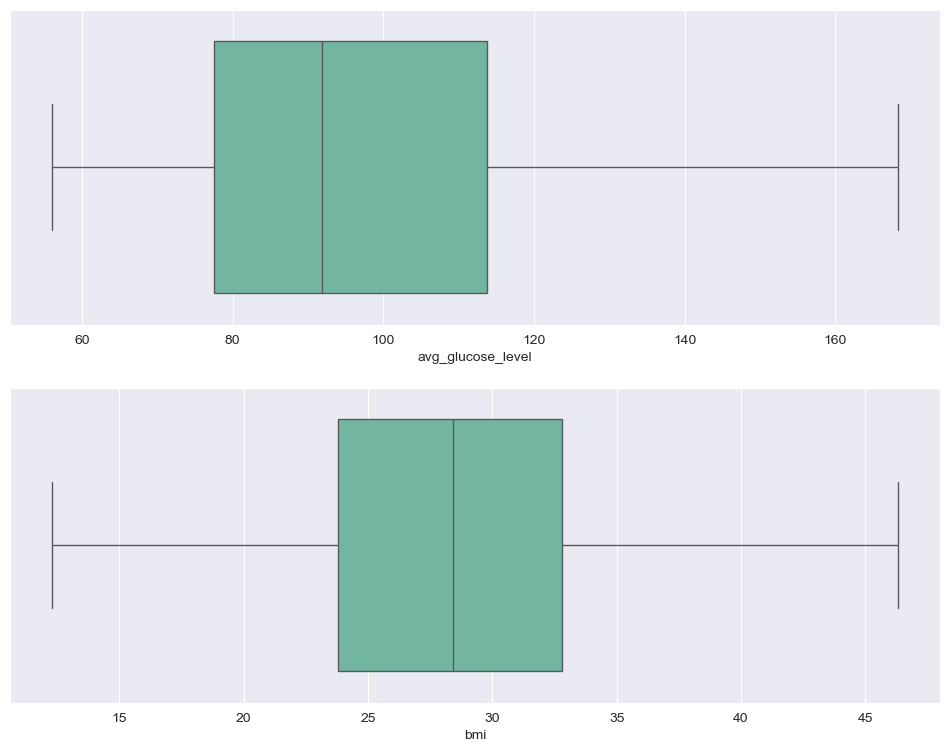

In [28]:
plt.figure(figsize=(12,9))
for i,col in enumerate(stroke_df.select_dtypes(float).columns[1:]):
    plt.subplot(2,1,i+1)
    sns.boxplot(data=stroke_df,x=col,palette =sns.color_palette("Set2"))

#### Exploratory-Data-Analysis¶


In [29]:
stroke_df['smoking_status'].value_counts()

smoking_status
never smoked       1869
Unknown            1523
formerly smoked     875
smokes              776
Name: count, dtype: int64

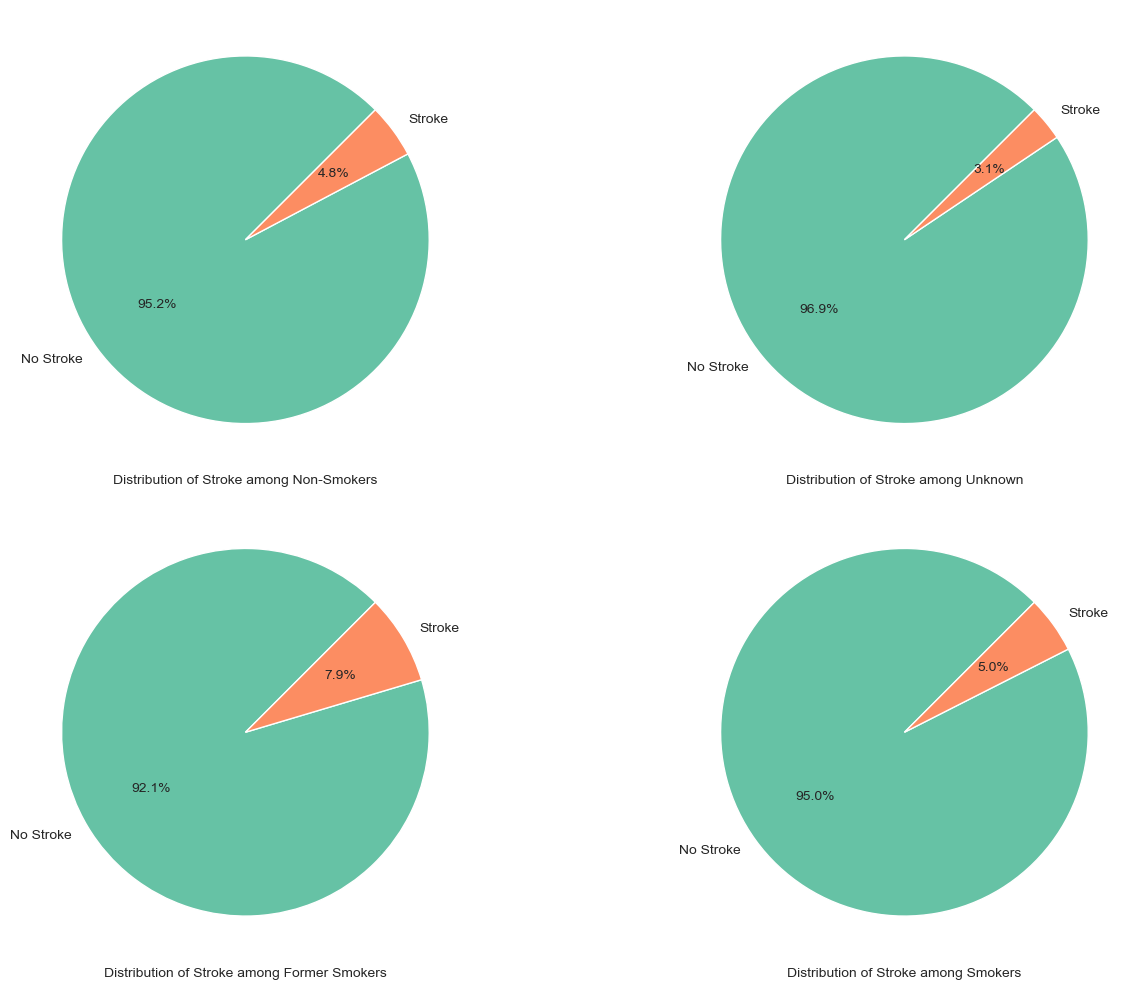

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Updated color scheme
color1 = ['#66c2a5', '#fc8d62']

# Distribution of stroke among Non-Smoker
ax[0, 0].pie(
    x=stroke_df.loc[stroke_df['smoking_status'] == 'never smoked']['stroke'].value_counts(),
    labels=['No Stroke', 'Stroke'],
    startangle=45,
    autopct='%1.1f%%',
    colors=color1
)
ax[0, 0].set_xlabel("Distribution of Stroke among Non-Smokers")

# Distribution of stroke among Unknown
ax[0, 1].pie(
    x=stroke_df.loc[stroke_df['smoking_status'] == 'Unknown']['stroke'].value_counts(),
    labels=['No Stroke', 'Stroke'],
    startangle=45,
    autopct='%1.1f%%',
    colors=color1
)
ax[0, 1].set_xlabel("Distribution of Stroke among Unknown")

# Distribution of stroke among Former Smokers
ax[1, 0].pie(
    x=stroke_df.loc[stroke_df['smoking_status'] == 'formerly smoked']['stroke'].value_counts(),
    labels=['No Stroke', 'Stroke'],
    startangle=45,
    autopct='%1.1f%%',
    colors=color1
)
ax[1, 0].set_xlabel("Distribution of Stroke among Former Smokers")

# Distribution of stroke among Smokers
ax[1, 1].pie(
    x=stroke_df.loc[stroke_df['smoking_status'] == 'smokes']['stroke'].value_counts(),
    labels=['No Stroke', 'Stroke'],
    startangle=45,
    autopct='%1.1f%%',
    colors=color1
)
ax[1, 1].set_xlabel("Distribution of Stroke among Smokers")

plt.tight_layout()
plt.show()


#### Univariate Analysis

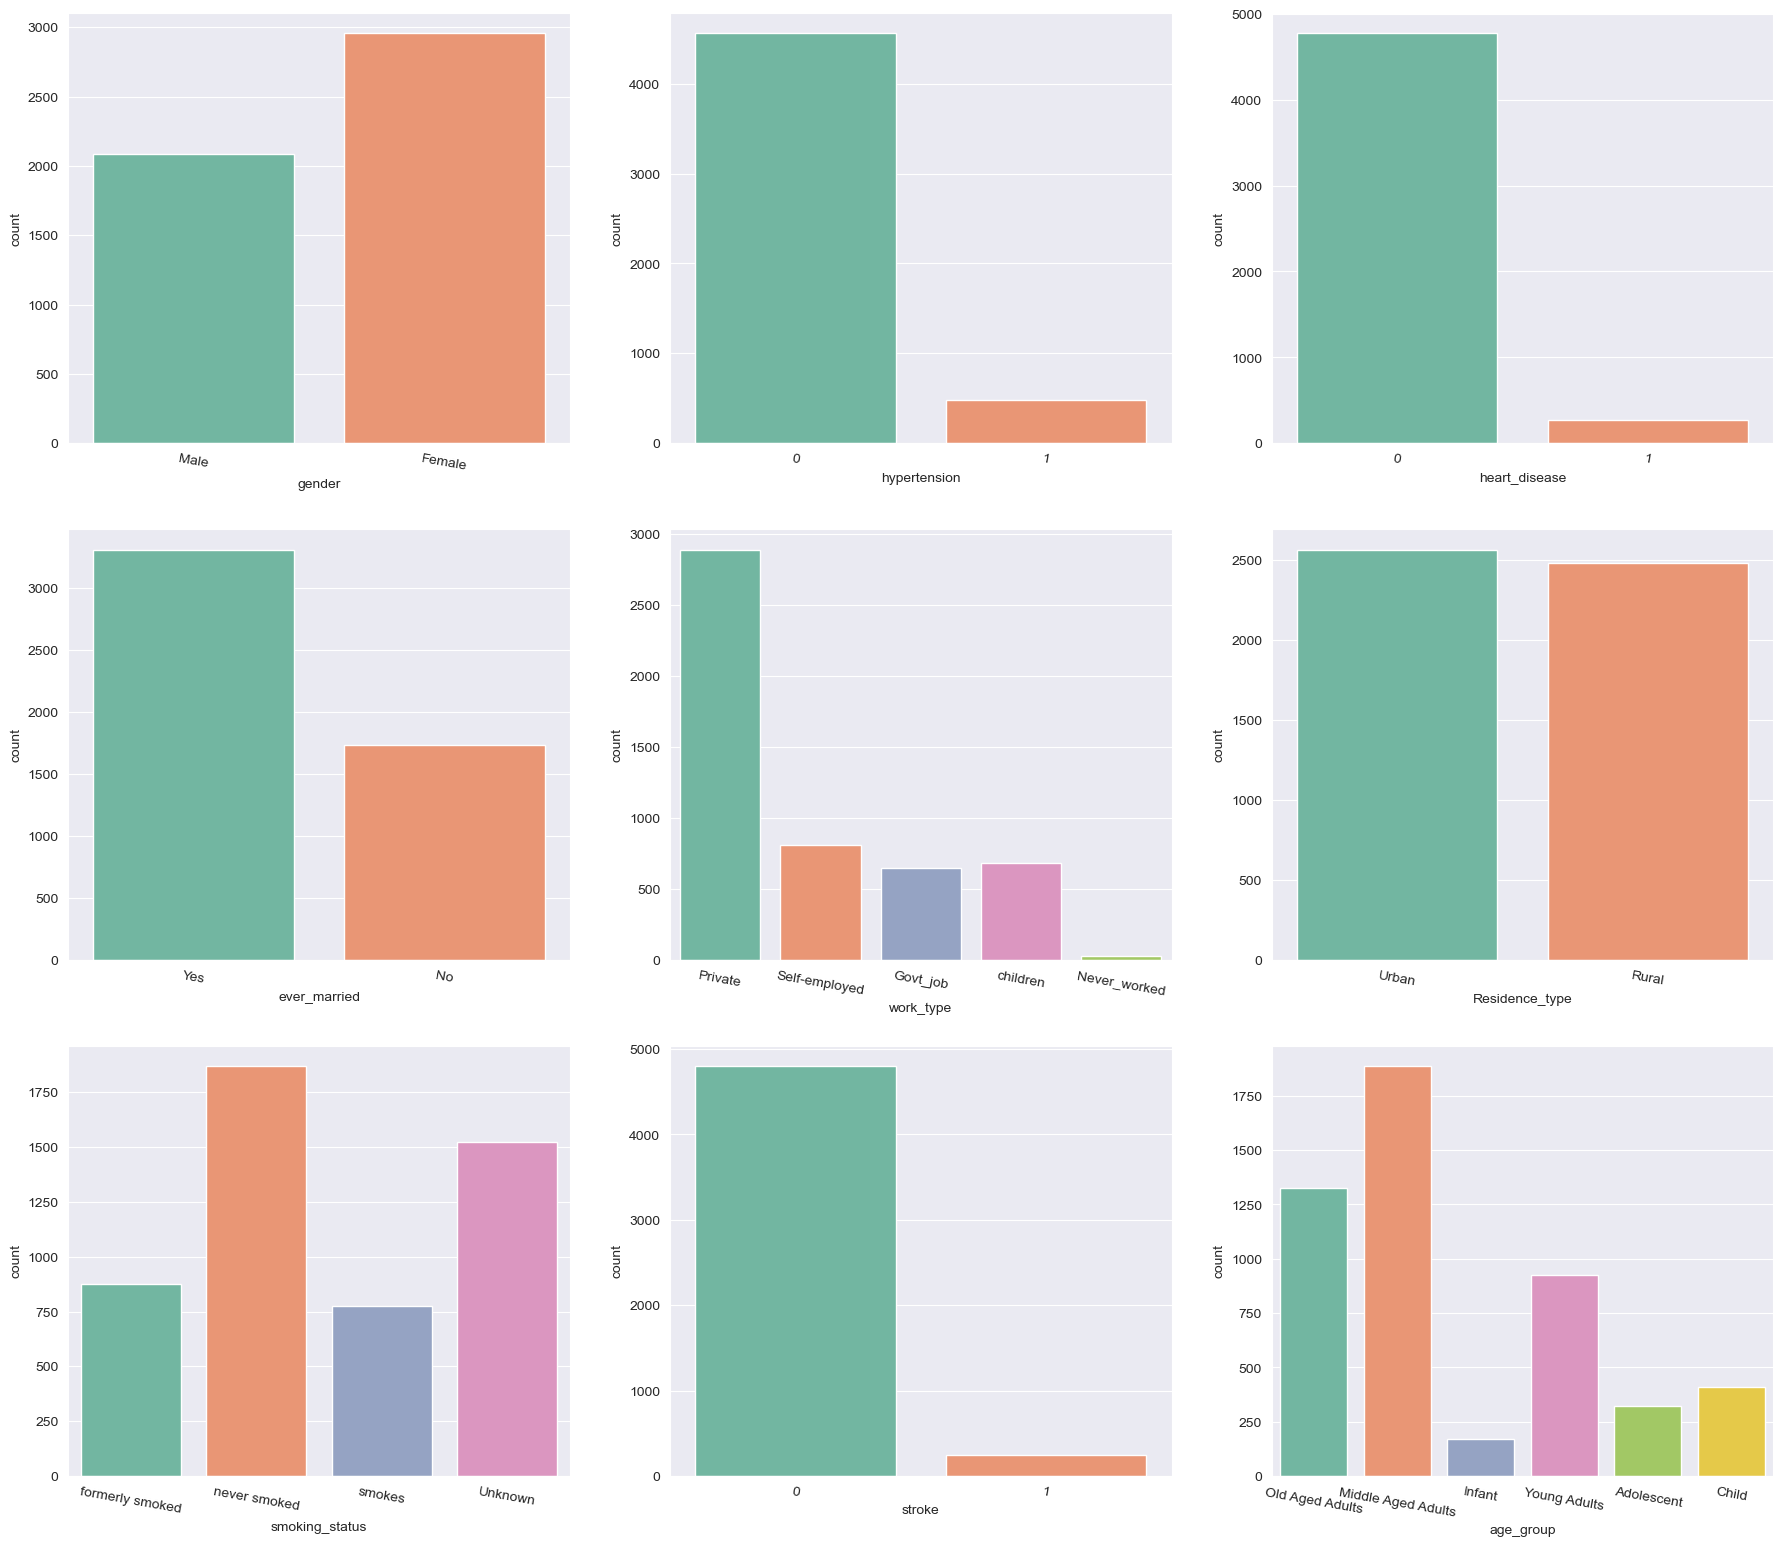

In [31]:
plt.figure(figsize=(22,19))
for i,col in enumerate(stroke_df.select_dtypes(exclude=float).columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=stroke_df,x=col,palette =sns.color_palette("Set2"))
    plt.xticks(rotation=-10)

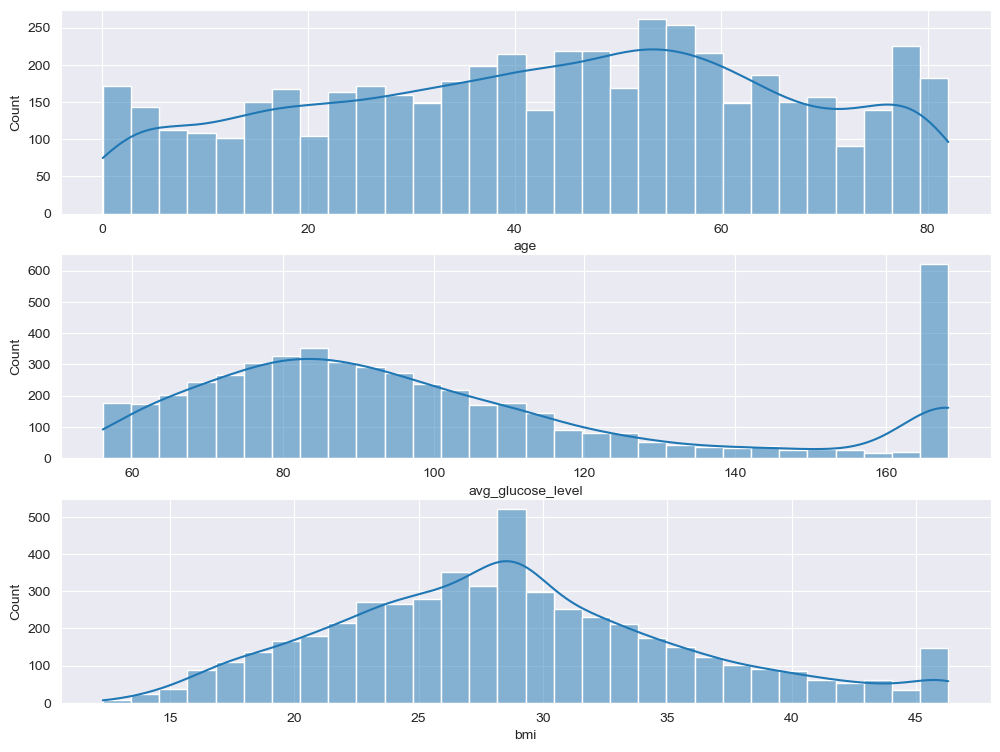

In [32]:
plt.figure(figsize=(12,9))
for i,col in enumerate(stroke_df.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.histplot(data=stroke_df,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))

#### Multivariate Analysis

**** Does gender affect having a stroke?¶


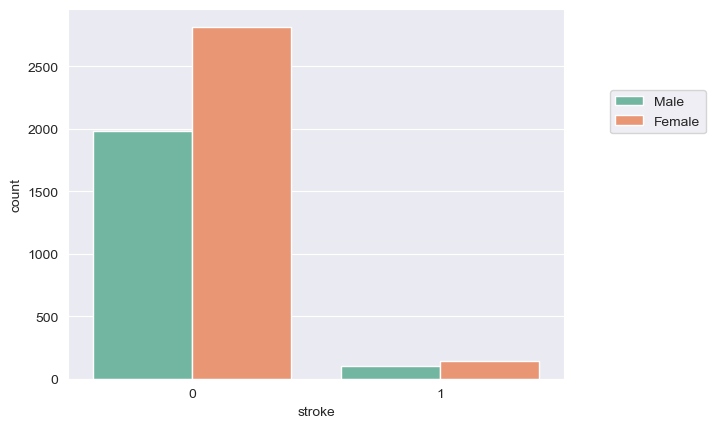

In [33]:
sns.countplot(stroke_df,x="stroke",hue="gender",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.3,0.8))

***  No Gender has no relation¶


#### Data Preprocessing

In [34]:
# get list of categorical columns
cat_cols = stroke_df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'age_group']

In [35]:
stroke_df=stroke_df.drop(['gender' ], axis=1)

#### Enconding

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()
for col in stroke_df.columns:
  if stroke_df[col].dtype == 'object':
    stroke_df[col] = label_encoder.fit_transform(stroke_df[col])

In [37]:
stroke_df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,67.0,0,1,1,2,1,168.2925,36.600000,1,1,4
1,61.0,0,0,1,3,0,168.2925,28.893237,2,1,4
2,80.0,0,1,1,2,0,105.9200,32.500000,2,1,4
3,49.0,0,0,1,2,1,168.2925,34.400000,3,1,3
4,79.0,1,0,1,3,0,168.2925,24.000000,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,2,1,83.7500,28.893237,2,0,4
5106,81.0,0,0,1,3,1,125.2000,40.000000,2,0,4
5107,35.0,0,0,1,3,0,82.9900,30.600000,2,0,5
5108,51.0,0,0,1,2,0,166.2900,25.600000,1,0,3


#### Checking Data Imabalce

Counts of target classes:
stroke
0    4799
1     244
Name: count, dtype: int64

Percentage distribution of target classes:
stroke
0    95.16161
1     4.83839
Name: proportion, dtype: float64


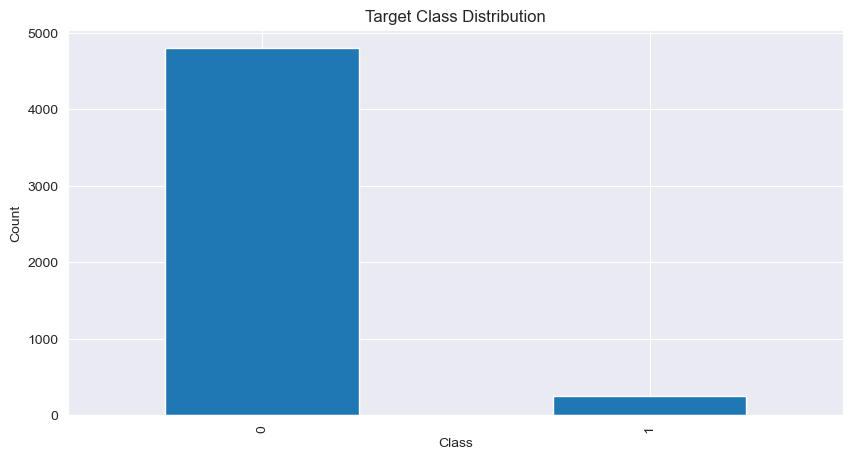

In [38]:
# Assuming df is your DataFrame and 'target' is your target column
target_counts = stroke_df['stroke'].value_counts()
target_percentage = stroke_df['stroke'].value_counts(normalize=True) * 100

print("Counts of target classes:")
print(target_counts)

print("\nPercentage distribution of target classes:")
print(target_percentage)

# Bar plot
plt.figure(figsize=(10, 5))
target_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()

#### Handle Imbalced Use SMOTE Technique

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
# Step 2: Split the Dataset
X = stroke_df.drop('stroke', axis=1)  # Features (excluding the target 'crop')
y = stroke_df['stroke']  # Target variable (crop)

# Step 3: Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [40]:
from sklearn.model_selection import train_test_split

# Step 5: Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the Shapes of Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)


Shape of training feature: (7678, 10)
Shape of testing feature: (1920, 10)
Shape of training label: (7678,)
Shape of testing label: (1920,)


#### Build Randomforest Model

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200],  
    'max_depth': [6, 8],  
    'min_samples_split': [30, 40],  
    'min_samples_leaf': [20, 30],  
    'criterion': ['gini'],  # Function to measure the quality of a split
}

# Initialize the RandomForestClassifier model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the models with the adjusted parameters
grid_search_rf.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Predict on the training set
y_train_pred_rf = best_rf_model.predict(X_train)

# Predict on the test set
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate probabilities for ROC curves
y_train_prob_rf = best_rf_model.predict_proba(X_train)[:, 1]
y_test_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate metrics for the best model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
recall_test_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
f1_test_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

# Calculate metrics for the best model on the training set
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_train_rf = precision_score(y_train, y_train_pred_rf, average='weighted')
recall_train_rf = recall_score(y_train, y_train_pred_rf, average='weighted')
f1_train_rf = f1_score(y_train, y_train_pred_rf, average='weighted')

# Print metrics
print(f'Best Parameters: {grid_search_rf.best_params_}')
print(f'Training Accuracy: {accuracy_train_rf:.2f}')
print(f'Test Accuracy: {accuracy_test_rf:.2f}')
print(f'Training Precision: {precision_train_rf:.2f}')
print(f'Test Precision: {precision_test_rf:.2f}')
print(f'Training Recall: {recall_train_rf:.2f}')
print(f'Test Recall: {recall_test_rf:.2f}')
print(f'Training F1 Score: {f1_train_rf:.2f}')
print(f'Test F1 Score: {f1_test_rf:.2f}')

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 200}
Training Accuracy: 0.88
Test Accuracy: 0.87
Training Precision: 0.88
Test Precision: 0.87
Training Recall: 0.88
Test Recall: 0.87
Training F1 Score: 0.88
Test F1 Score: 0.87


#### Evaluation

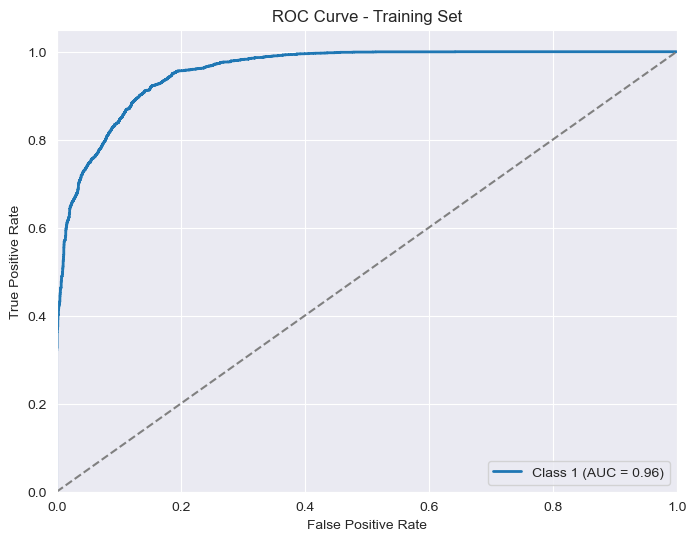

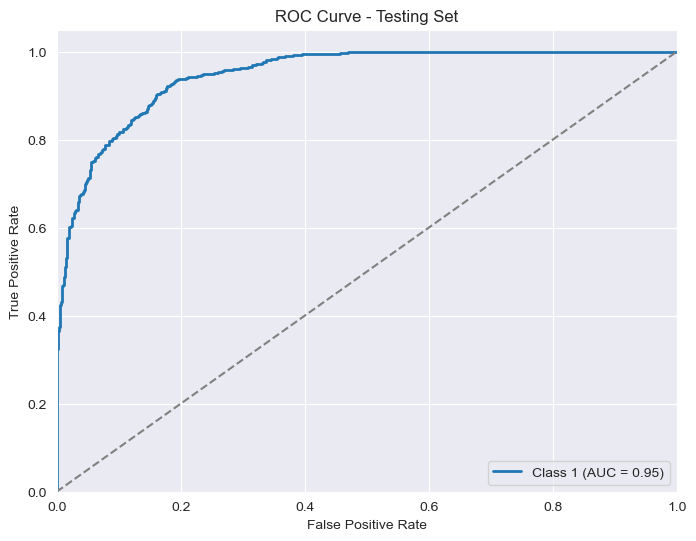

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_train and y_test are your true labels
classes = best_rf_model.classes_

# Calculate probabilities for ROC curves
y_train_prob = best_rf_model.predict_proba(X_train)[:, 1]  # Probability for the positive class
y_test_prob = best_rf_model.predict_proba(X_test)[:, 1]    # Probability for the positive class

# Plotting the ROC Curve for the Training set
plt.figure(figsize=(8, 6))
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, lw=2, label=f'Class {classes[1]} (AUC = {roc_auc_train:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set')
plt.legend(loc="lower right")
plt.show()

# Plotting the ROC Curve for the Testing set
plt.figure(figsize=(8, 6))
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, lw=2, label=f'Class {classes[1]} (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set')
plt.legend(loc="lower right")
plt.show()


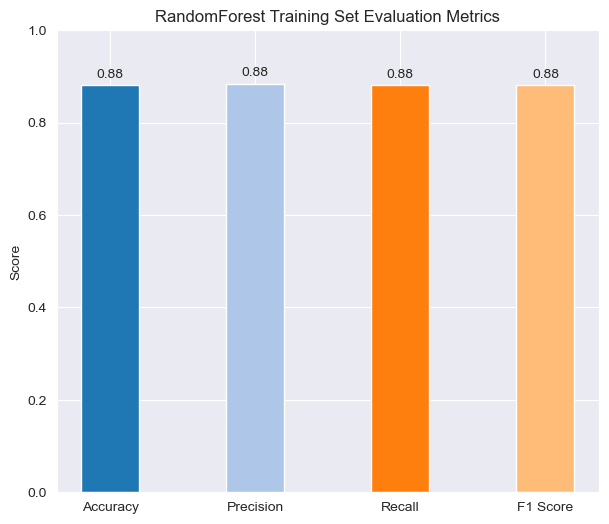

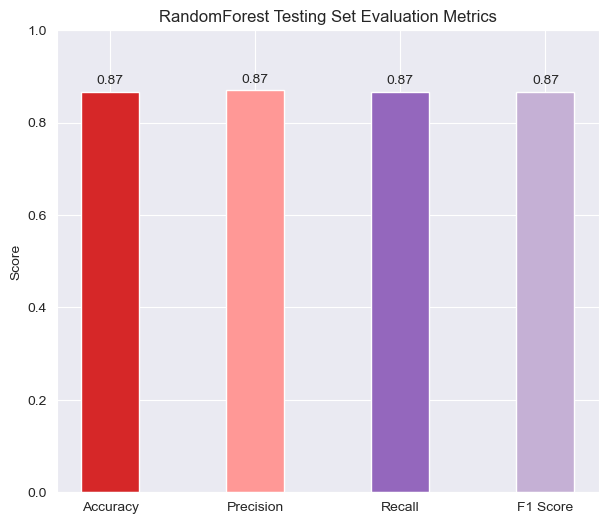

In [45]:

# Define metrics for the training set using RandomForest model
metrics_train_rf = {
    'Accuracy': accuracy_train_rf,
    'Precision': precision_train_rf,
    'Recall': recall_train_rf,
    'F1 Score': f1_train_rf
}

# Define metrics for the testing set using RandomForest model
metrics_test_rf = {
    'Accuracy': accuracy_test_rf,
    'Precision': precision_test_rf,
    'Recall': recall_test_rf,
    'F1 Score': f1_test_rf
}

# Color schemes for the bars
train_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']  # Blue to Orange gradient for training
test_colors = ['#d62728', '#ff9896', '#9467bd', '#c5b0d5']   # Red to Purple gradient for testing

# Plotting Training Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_train_rf.keys(), metrics_train_rf.values(), color=train_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('RandomForest Training Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# Plotting Testing Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_test_rf.keys(), metrics_test_rf.values(), color=test_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('RandomForest Testing Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


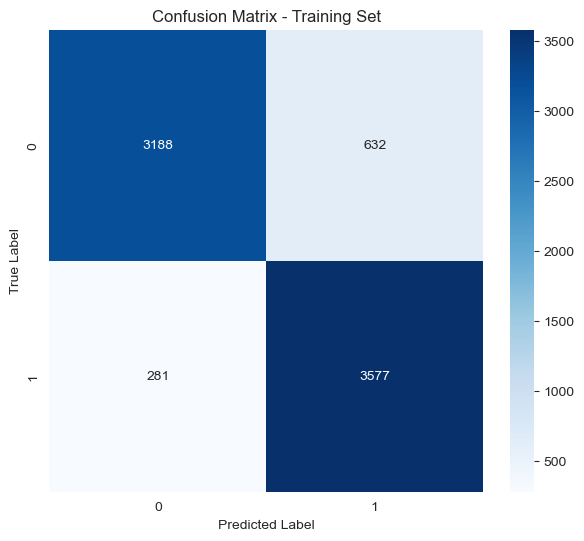

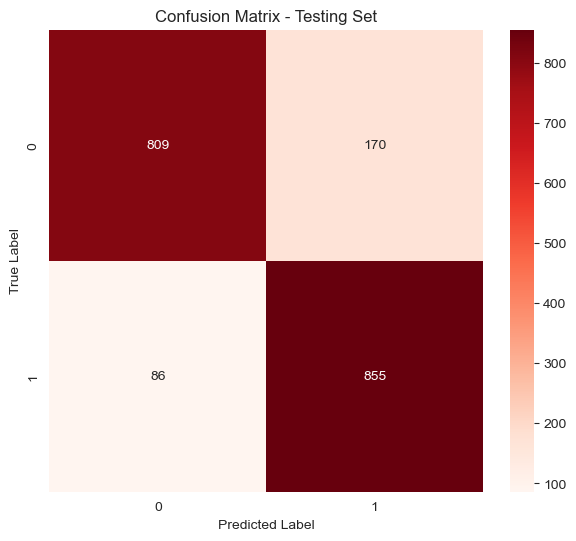

In [46]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix for the training set predictions
conf_matrix_train = confusion_matrix(y_train, y_train_pred_rf)

# Generate the confusion matrix for the test set predictions
conf_matrix_test = confusion_matrix(y_test, y_test_pred_rf)

# Plotting Confusion Matrix for the Training Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Confusion Matrix for the Testing Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### Support Vector Machine Model 

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.01, 0.1, 1],  
    'kernel': ['linear'],  # Use only the linear kernel
    'gamma': ['scale']  # Use scale for linear kernel 
}

# Initialize the SVM model
svm = SVC(probability=True)

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the adjusted parameters
grid_search_svm.fit(X_train, y_train)

# Get the best model from the grid search
best_svm_model = grid_search_svm.best_estimator_

# Predict on the training set
y_train_pred_svm = best_svm_model.predict(X_train)

# Predict on the test set
y_test_pred_svm = best_svm_model.predict(X_test)

# Calculate metrics for the best model on the test set
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
precision_test_svm = precision_score(y_test, y_test_pred_svm, average='weighted')
recall_test_svm = recall_score(y_test, y_test_pred_svm, average='weighted')
f1_test_svm = f1_score(y_test, y_test_pred_svm, average='weighted')

# Calculate metrics for the best model on the training set
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
precision_train_svm = precision_score(y_train, y_train_pred_svm, average='weighted')
recall_train_svm = recall_score(y_train, y_train_pred_svm, average='weighted')
f1_train_svm = f1_score(y_train, y_train_pred_svm, average='weighted')

# Print metrics
print(f'Best Parameters: {grid_search_svm.best_params_}')
print(f'Training Accuracy: {accuracy_train_svm:.2f}')
print(f'Test Accuracy: {accuracy_test_svm:.2f}')
print(f'Training Precision: {precision_train_svm:.2f}')
print(f'Test Precision: {precision_test_svm:.2f}')
print(f'Training Recall: {recall_train_svm:.2f}')
print(f'Test Recall: {recall_test_svm:.2f}')
print(f'Training F1 Score: {f1_train_svm:.2f}')
print(f'Test F1 Score: {f1_test_svm:.2f}')


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Training Accuracy: 0.78
Test Accuracy: 0.77
Training Precision: 0.79
Test Precision: 0.78
Training Recall: 0.78
Test Recall: 0.77
Training F1 Score: 0.78
Test F1 Score: 0.77


#### Evaluation 

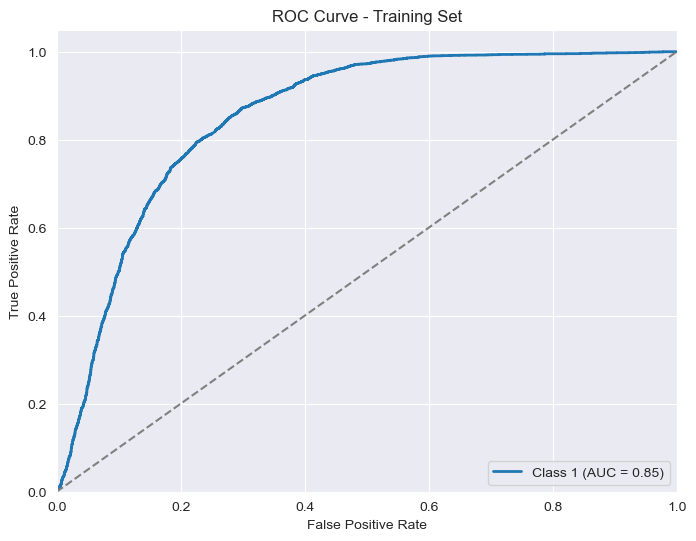

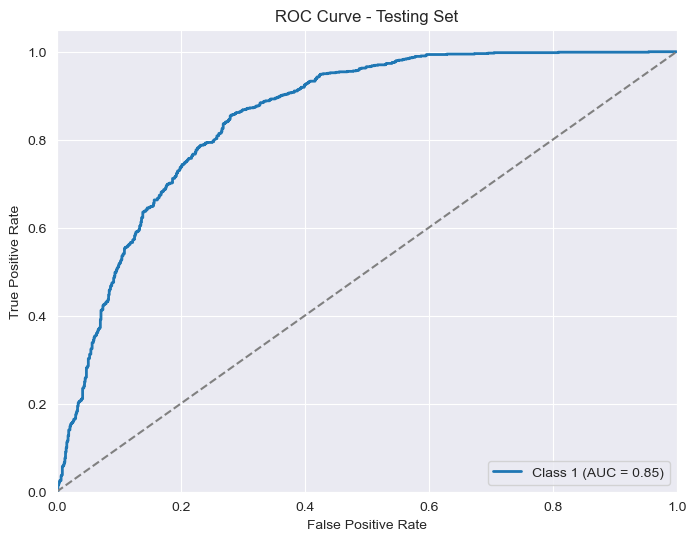

In [48]:

# Assuming y_train and y_test are your true labels
classes = best_svm_model.classes_

# Calculate probabilities for ROC curves
y_train_prob = best_svm_model.predict_proba(X_train)[:, 1]  
y_test_prob = best_svm_model.predict_proba(X_test)[:, 1]    

# Plotting the ROC Curve for the Training set
plt.figure(figsize=(8, 6))
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, lw=2, label=f'Class {classes[1]} (AUC = {roc_auc_train:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set')
plt.legend(loc="lower right")
plt.show()

# Plotting the ROC Curve for the Testing set
plt.figure(figsize=(8, 6))
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, lw=2, label=f'Class {classes[1]} (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set')
plt.legend(loc="lower right")
plt.show()

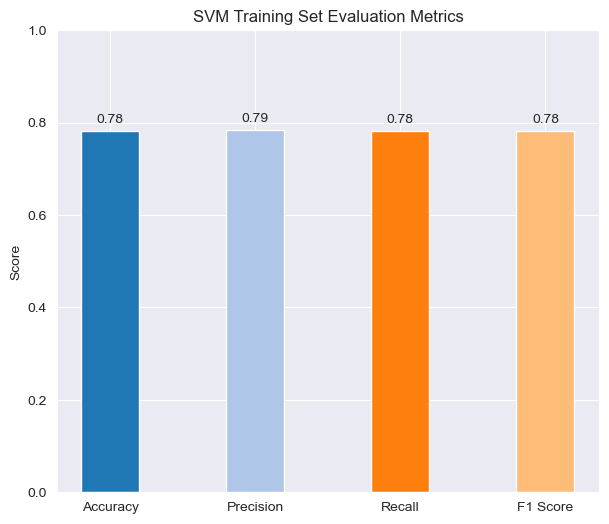

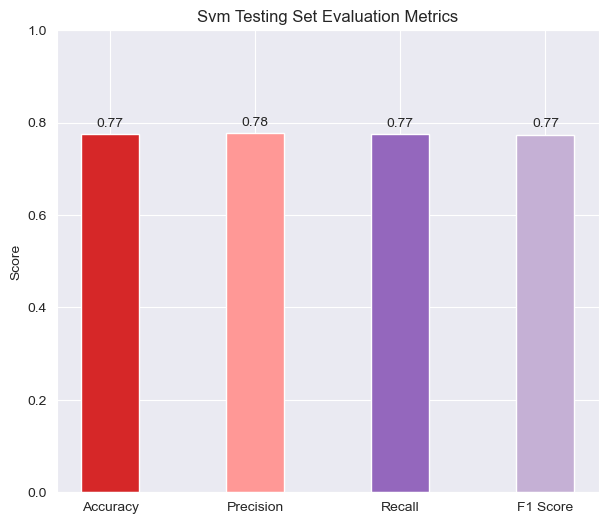

In [49]:
# Define metrics for the training set using RandomForest model
metrics_train_svm = {
    'Accuracy': accuracy_train_svm,
    'Precision': precision_train_svm,
    'Recall': recall_train_svm,
    'F1 Score': f1_train_svm
}

# Define metrics for the testing set using RandomForest model
metrics_test_svm = {
    'Accuracy': accuracy_test_svm,
    'Precision': precision_test_svm,
    'Recall': recall_test_svm,
    'F1 Score': f1_test_svm
}

# Color schemes for the bars
train_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']  # Blue to Orange gradient for training
test_colors = ['#d62728', '#ff9896', '#9467bd', '#c5b0d5']   # Red to Purple gradient for testing

# Plotting Training Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_train_svm.keys(), metrics_train_svm.values(), color=train_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('SVM Training Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# Plotting Testing Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_test_svm.keys(), metrics_test_svm.values(), color=test_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Svm Testing Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

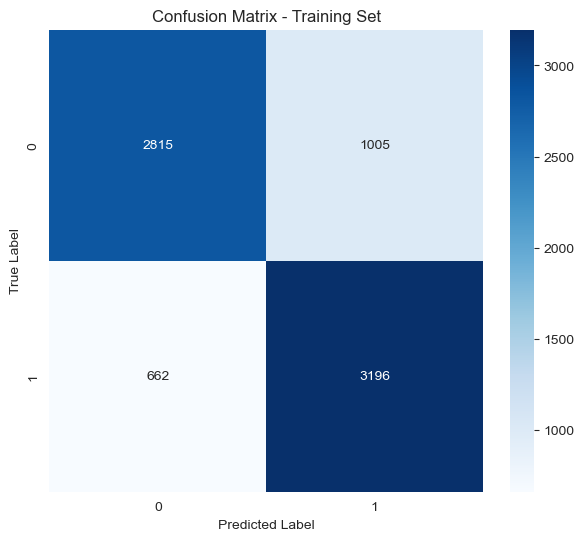

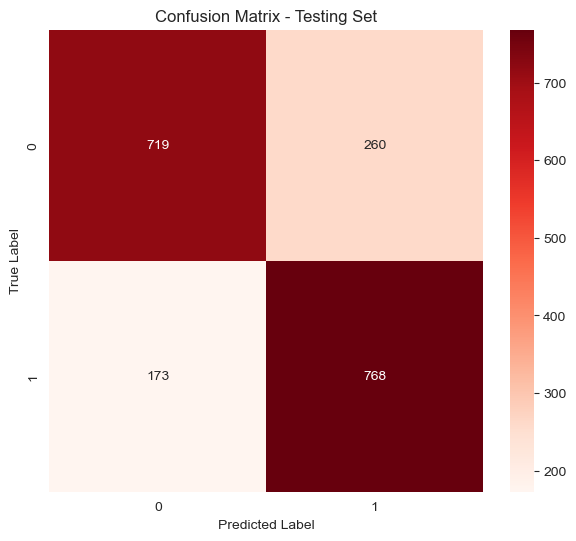

In [50]:
# Generate the confusion matrix for the training set predictions
conf_matrix_train = confusion_matrix(y_train, y_train_pred_svm)

# Generate the confusion matrix for the test set predictions
conf_matrix_test = confusion_matrix(y_test, y_test_pred_svm)

# Plotting Confusion Matrix for the Training Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Confusion Matrix for the Testing Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### CatBoost Classifier

In [51]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for CatBoostClassifier
param_grid_cat = {
    'iterations': [100, 200],
    'depth': [6, 8],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5],
}

# Initialize CatBoostClassifier model
cat = CatBoostClassifier(verbose=0)

# Initialize GridSearchCV for CatBoost
grid_search_cat = GridSearchCV(cat, param_grid_cat, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_cat.fit(X_train, y_train)

# Get the best model
best_cat_model = grid_search_cat.best_estimator_

# Predict on the training and test set
y_train_pred_cat = best_cat_model.predict(X_train)
y_test_pred_cat = best_cat_model.predict(X_test)

# Calculate metrics
accuracy_train_cat = accuracy_score(y_train, y_train_pred_cat)
accuracy_test_cat = accuracy_score(y_test, y_test_pred_cat)
precision_train_cat = precision_score(y_train, y_train_pred_cat, average='weighted')
precision_test_cat = precision_score(y_test, y_test_pred_cat, average='weighted')
recall_train_cat = recall_score(y_train, y_train_pred_cat, average='weighted')
recall_test_cat = recall_score(y_test, y_test_pred_cat, average='weighted')
f1_train_cat = f1_score(y_train, y_train_pred_cat, average='weighted')
f1_test_cat = f1_score(y_test, y_test_pred_cat, average='weighted')

# Print metrics
print(f'CatBoost Best Parameters: {grid_search_cat.best_params_}')
print(f'CatBoost Training Accuracy: {accuracy_train_cat:.2f}')
print(f'CatBoost Test Accuracy: {accuracy_test_cat:.2f}')
print(f'CatBoost Training Precision: {precision_train_cat:.2f}')
print(f'CatBoost Test Precision: {precision_test_cat:.2f}')
print(f'CatBoost Training Recall: {recall_train_cat:.2f}')
print(f'CatBoost Test Recall: {recall_test_cat:.2f}')
print(f'CatBoost Training F1 Score: {f1_train_cat:.2f}')
print(f'CatBoost Test F1 Score: {f1_test_cat:.2f}')
print('---------------------------')


CatBoost Best Parameters: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
CatBoost Training Accuracy: 0.99
CatBoost Test Accuracy: 0.96
CatBoost Training Precision: 0.99
CatBoost Test Precision: 0.96
CatBoost Training Recall: 0.99
CatBoost Test Recall: 0.96
CatBoost Training F1 Score: 0.99
CatBoost Test F1 Score: 0.96
---------------------------


#### Evaluation 

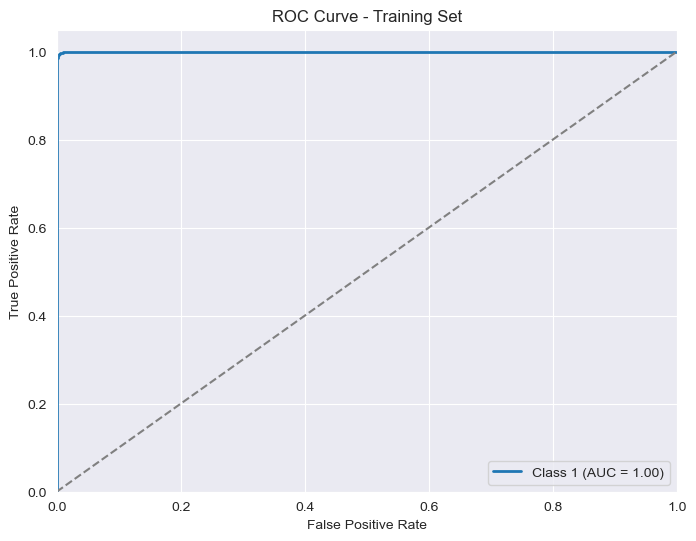

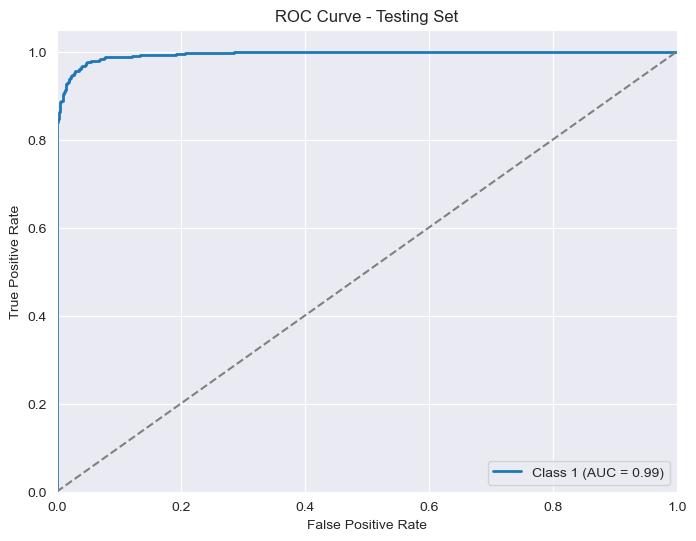

In [52]:

# Assuming y_train and y_test are your true labels
classes = best_cat_model.classes_

# Calculate probabilities for ROC curves
y_train_prob = best_cat_model.predict_proba(X_train)[:, 1]  
y_test_prob = best_cat_model.predict_proba(X_test)[:, 1]    

# Plotting the ROC Curve for the Training set
plt.figure(figsize=(8, 6))
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, lw=2, label=f'Class {classes[1]} (AUC = {roc_auc_train:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set')
plt.legend(loc="lower right")
plt.show()

# Plotting the ROC Curve for the Testing set
plt.figure(figsize=(8, 6))
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, lw=2, label=f'Class {classes[1]} (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set')
plt.legend(loc="lower right")
plt.show()

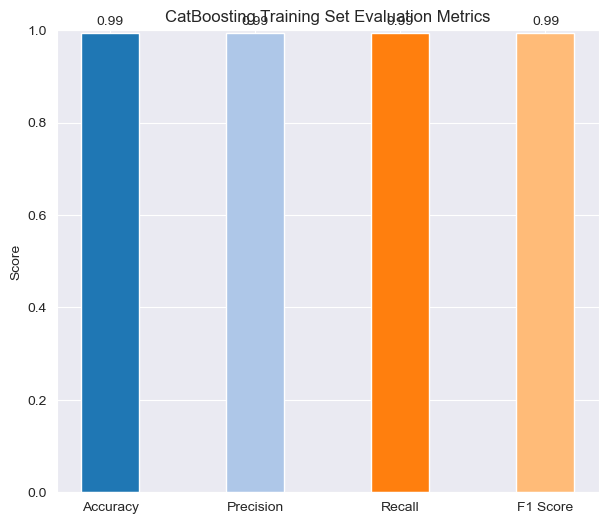

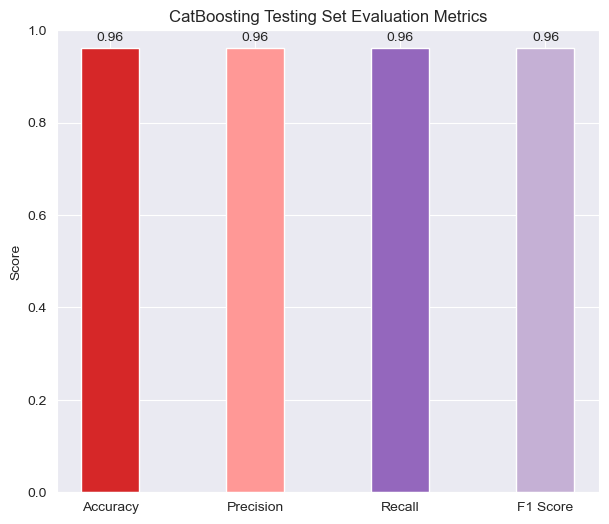

In [56]:
# Define metrics for the training set using RandomForest model
metrics_train_svm = {
    'Accuracy': accuracy_train_cat,
    'Precision': precision_train_cat,
    'Recall': recall_train_cat,
    'F1 Score': f1_train_cat
}

# Define metrics for the testing set using RandomForest model
metrics_test_svm = {
    'Accuracy': accuracy_test_cat,
    'Precision': precision_test_cat,
    'Recall': recall_test_cat,
    'F1 Score': f1_test_cat
}

# Color schemes for the bars
train_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']  # Blue to Orange gradient for training
test_colors = ['#d62728', '#ff9896', '#9467bd', '#c5b0d5']   # Red to Purple gradient for testing

# Plotting Training Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_train_svm.keys(), metrics_train_svm.values(), color=train_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('CatBoosting Training Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# Plotting Testing Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_test_svm.keys(), metrics_test_svm.values(), color=test_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('CatBoosting Testing Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

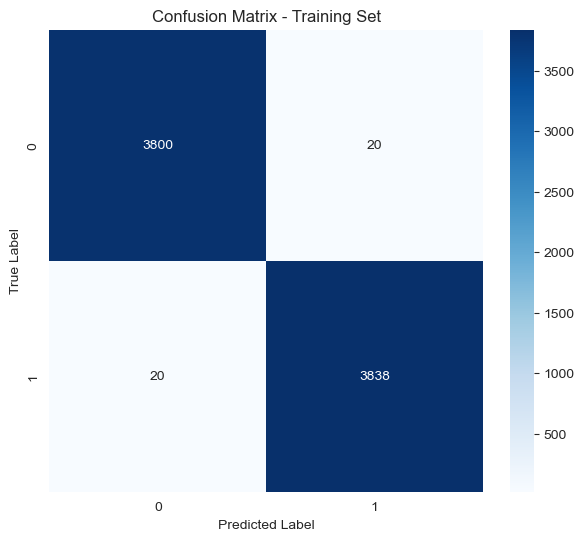

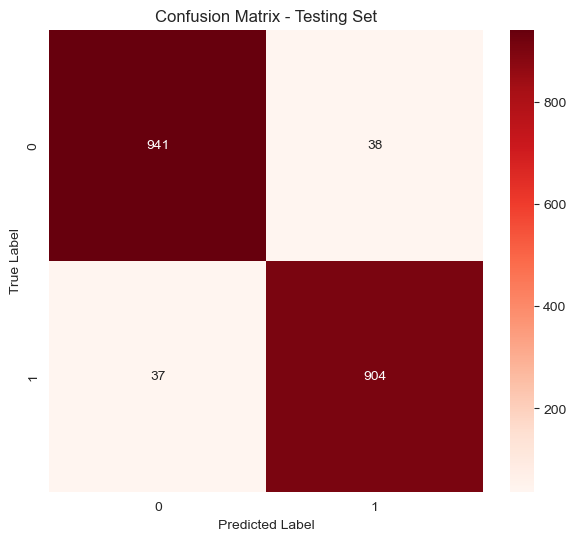

In [54]:
# Generate the confusion matrix for the training set predictions
conf_matrix_train = confusion_matrix(y_train, y_train_pred_cat)

# Generate the confusion matrix for the test set predictions
conf_matrix_test = confusion_matrix(y_test, y_test_pred_cat)

# Plotting Confusion Matrix for the Training Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Confusion Matrix for the Testing Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Adaboosting Model 

In [55]:
from sklearn.ensemble import AdaBoostClassifier



# Define the parameter grid for AdaBoostClassifier
param_grid_ada = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1],
}

# Initialize AdaBoostClassifier model
ada = AdaBoostClassifier()

# Initialize GridSearchCV for AdaBoost
grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_ada.fit(X_train, y_train)

# Get the best model
best_ada_model = grid_search_ada.best_estimator_

# Predict on the training and test set
y_train_pred_ada = best_ada_model.predict(X_train)
y_test_pred_ada = best_ada_model.predict(X_test)

# Calculate metrics
accuracy_train_ada = accuracy_score(y_train, y_train_pred_ada)
accuracy_test_ada = accuracy_score(y_test, y_test_pred_ada)
precision_train_ada = precision_score(y_train, y_train_pred_ada, average='weighted')
precision_test_ada = precision_score(y_test, y_test_pred_ada, average='weighted')
recall_train_ada = recall_score(y_train, y_train_pred_ada, average='weighted')
recall_test_ada = recall_score(y_test, y_test_pred_ada, average='weighted')
f1_train_ada = f1_score(y_train, y_train_pred_ada, average='weighted')
f1_test_ada = f1_score(y_test, y_test_pred_ada, average='weighted')

# Print metrics
print(f'AdaBoost Best Parameters: {grid_search_ada.best_params_}')
print(f'AdaBoost Training Accuracy: {accuracy_train_ada:.2f}')
print(f'AdaBoost Test Accuracy: {accuracy_test_ada:.2f}')
print(f'AdaBoost Training Precision: {precision_train_ada:.2f}')
print(f'AdaBoost Test Precision: {precision_test_ada:.2f}')
print(f'AdaBoost Training Recall: {recall_train_ada:.2f}')
print(f'AdaBoost Test Recall: {recall_test_ada:.2f}')
print(f'AdaBoost Training F1 Score: {f1_train_ada:.2f}')
print(f'AdaBoost Test F1 Score: {f1_test_ada:.2f}')
print('---------------------------')



AdaBoost Best Parameters: {'learning_rate': 1, 'n_estimators': 100}
AdaBoost Training Accuracy: 0.89
AdaBoost Test Accuracy: 0.88
AdaBoost Training Precision: 0.89
AdaBoost Test Precision: 0.88
AdaBoost Training Recall: 0.89
AdaBoost Test Recall: 0.88
AdaBoost Training F1 Score: 0.89
AdaBoost Test F1 Score: 0.88
---------------------------


#### Evaluation

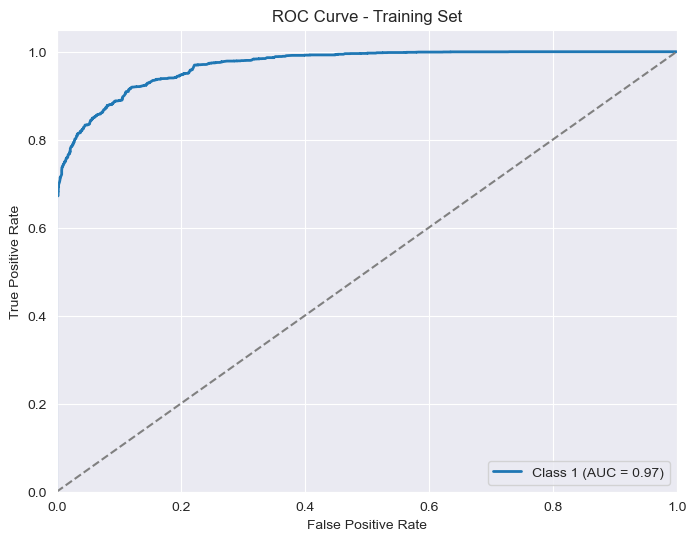

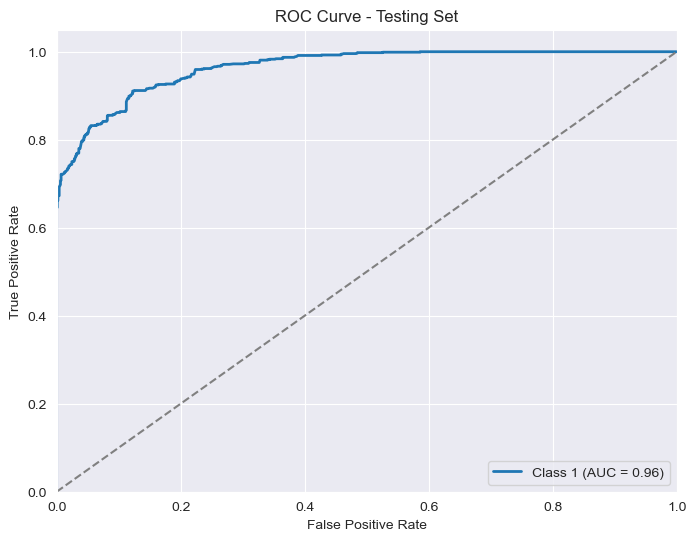

In [57]:
# Assuming y_train and y_test are your true labels
classes = best_ada_model.classes_

# Calculate probabilities for ROC curves
y_train_prob = best_ada_model.predict_proba(X_train)[:, 1]  
y_test_prob = best_ada_model.predict_proba(X_test)[:, 1]    

# Plotting the ROC Curve for the Training set
plt.figure(figsize=(8, 6))
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, lw=2, label=f'Class {classes[1]} (AUC = {roc_auc_train:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set')
plt.legend(loc="lower right")
plt.show()

# Plotting the ROC Curve for the Testing set
plt.figure(figsize=(8, 6))
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, lw=2, label=f'Class {classes[1]} (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Set')
plt.legend(loc="lower right")
plt.show()

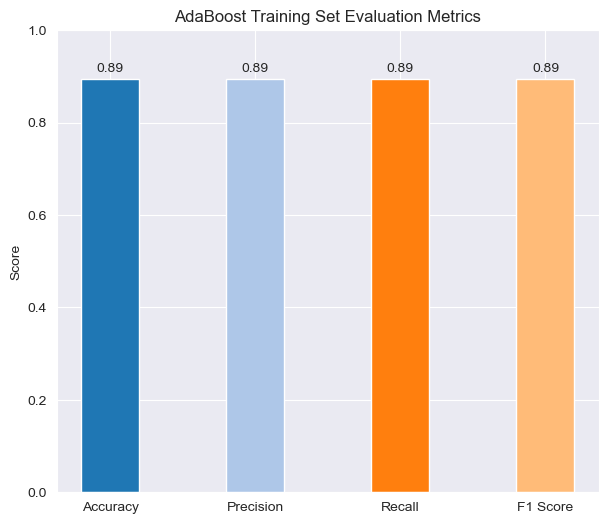

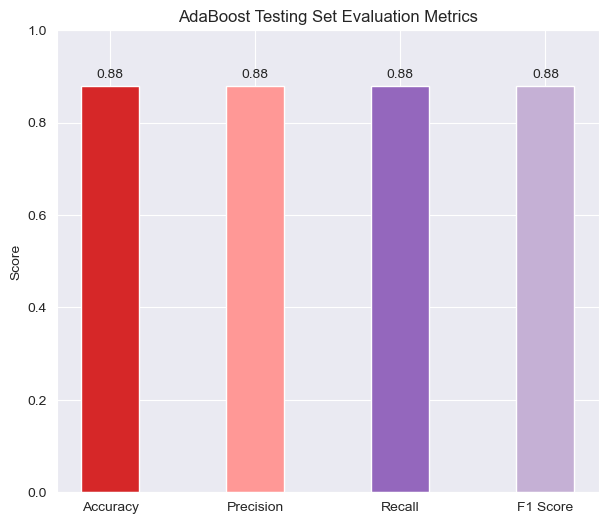

In [58]:
# Define metrics for the training set using RandomForest model
metrics_train_svm = {
    'Accuracy': accuracy_train_ada,
    'Precision': precision_train_ada,
    'Recall': recall_train_ada,
    'F1 Score': f1_train_ada
}

# Define metrics for the testing set using RandomForest model
metrics_test_svm = {
    'Accuracy': accuracy_test_ada,
    'Precision': precision_test_ada,
    'Recall': recall_test_ada,
    'F1 Score': f1_test_ada
}

# Color schemes for the bars
train_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']  # Blue to Orange gradient for training
test_colors = ['#d62728', '#ff9896', '#9467bd', '#c5b0d5']   # Red to Purple gradient for testing

# Plotting Training Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_train_svm.keys(), metrics_train_svm.values(), color=train_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('AdaBoost Training Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# Plotting Testing Set Evaluation Metrics for RandomForest
plt.figure(figsize=(7, 6))
bars = plt.bar(metrics_test_svm.keys(), metrics_test_svm.values(), color=test_colors, width=0.4)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('AdaBoost Testing Set Evaluation Metrics')

# Annotating each bar with its corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

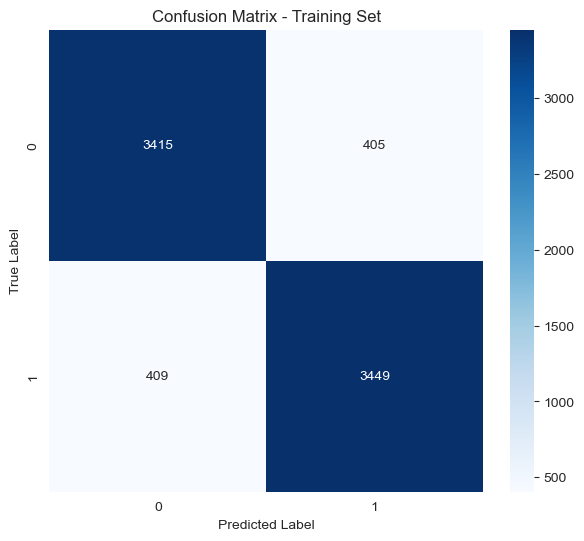

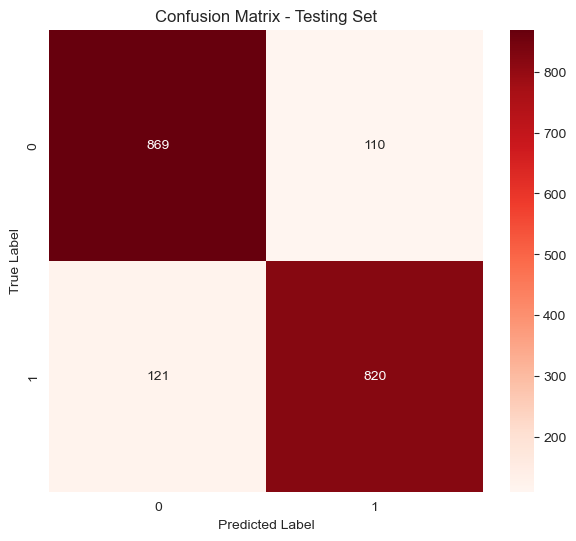

In [59]:
# Generate the confusion matrix for the training set predictions
conf_matrix_train = confusion_matrix(y_train, y_train_pred_ada)

# Generate the confusion matrix for the test set predictions
conf_matrix_test = confusion_matrix(y_test, y_test_pred_ada)

# Plotting Confusion Matrix for the Training Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Confusion Matrix for the Testing Set
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()